<a href="https://colab.research.google.com/github/sa21262/datascience22/blob/main/Assignment21a/balanced_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn import metrics
from sklearn import datasets
import sklearn
from collections import Counter
from imblearn.datasets import make_imbalance
import pylab as pl

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/sa21262/datascience22/main/Assignment21a/balanced_bank.csv")
df

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,34579,35,admin.,single,university.degree,no,yes,no,cellular,may,thu,143,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,446,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,20173,36,admin.,married,university.degree,no,no,no,cellular,aug,mon,610,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,18171,37,admin.,married,high.school,no,yes,yes,telephone,jul,wed,1089,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,30128,31,management,single,university.degree,no,yes,no,cellular,apr,thu,211,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,28870,45,blue-collar,married,unknown,no,yes,no,cellular,apr,thu,944,1,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,yes
9276,30452,60,admin.,married,university.degree,no,yes,no,cellular,may,mon,1602,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
9277,28937,38,blue-collar,married,basic.9y,no,yes,no,cellular,apr,fri,612,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
9278,16739,41,technician,single,university.degree,no,no,no,cellular,jul,thu,537,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [18]:
df.info() # information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9280 non-null   int64  
 1   age             9280 non-null   int64  
 2   job             9280 non-null   object 
 3   marital         9280 non-null   object 
 4   education       9280 non-null   object 
 5   default         9280 non-null   object 
 6   housing         9280 non-null   object 
 7   loan            9280 non-null   object 
 8   contact         9280 non-null   object 
 9   month           9280 non-null   object 
 10  day_of_week     9280 non-null   object 
 11  duration        9280 non-null   int64  
 12  campaign        9280 non-null   int64  
 13  pdays           9280 non-null   int64  
 14  previous        9280 non-null   int64  
 15  poutcome        9280 non-null   object 
 16  emp.var.rate    9280 non-null   float64
 17  cons.price.idx  9280 non-null   f

In [19]:
print("Number of rows before dropping NaNs: %d" % len(df)) #dropping NaN values 
                                                        
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df)) #the results show that no NaN Values are found

Number of rows before dropping NaNs: 9280
Number of rows after dropping NaNs: 9280


In [20]:
# LabelEncoder is applied here, so levels are numbered now 
label_enc = LabelEncoder()
df['y'] = label_enc.fit_transform(df['y']) # label Class is transformed into numbers 

df['y'].value_counts() #balanced dataset

0    4640
1    4640
Name: y, dtype: int64

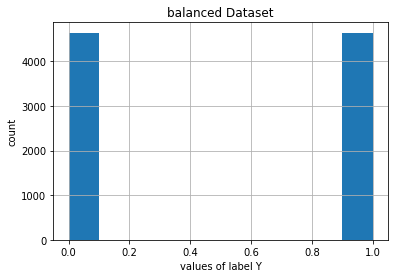

In [21]:
histogram1=df['y'].hist() #balanced target variable

fig = histogram1.get_figure()

pl.title("balanced Dataset")
pl.xlabel("values of label Y")
pl.ylabel("count")

fig.savefig('balanced 2.pdf')

In [22]:
df = pd.get_dummies(df) #onehot encoding is performed 
df

,Unnamed: 0,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,34579,35,143,1,999,1,-1.8,92.893,-46.2,1.266,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,446,42,1623,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,20173,36,610,2,999,0,1.4,93.444,-36.1,4.965,5228.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,18171,37,1089,2,999,0,1.4,93.918,-42.7,4.963,5228.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,30128,31,211,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,28870,45,944,1,999,1,-1.8,93.075,-47.1,1.410,5099.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9276,30452,60,1602,2,999,0,-1.8,92.893,-46.2,1.354,5099.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
9277,28937,38,612,1,999,1,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9278,16739,41,537,2,999,0,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [23]:

df.columns.str.match("Unnamed") # dropping a unnamed column because it represents the customer number and that is irrelevant for my data
df.loc[:,~df.columns.str.match("Unnamed")]


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,35,143,1,999,1,-1.8,92.893,-46.2,1.266,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,42,1623,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,36,610,2,999,0,1.4,93.444,-36.1,4.965,5228.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,37,1089,2,999,0,1.4,93.918,-42.7,4.963,5228.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,31,211,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,45,944,1,999,1,-1.8,93.075,-47.1,1.410,5099.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9276,60,1602,2,999,0,-1.8,92.893,-46.2,1.354,5099.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
9277,38,612,1,999,1,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9278,41,537,2,999,0,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [24]:
y=df['y'].copy()
x=df.drop(['y'],axis=1)
print(f'Distribution before imbalancing: {Counter(y)}')

print ('65% Imbalance \n' ) # number of 1's are 65% of the total lenght of column class 
X1, y1 = make_imbalance(x, y,
                              sampling_strategy={0: 2499, 1: 4640},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y1)}')

print ('total number of rows now =', len(y1))

Distribution before imbalancing: Counter({0: 4640, 1: 4640})
65% Imbalance 

Distribution after imbalancing: Counter({1: 4640, 0: 2499})
total number of rows now = 7139


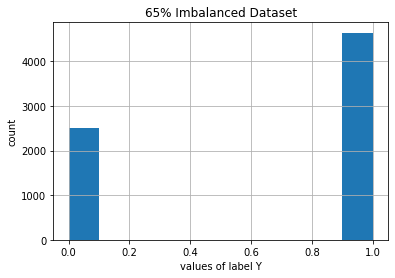

In [25]:
histogram2=y1.hist() # 65% are 1's

fig = histogram2.get_figure()

pl.title("65% Imbalanced Dataset")
pl.xlabel("values of label Y")
pl.ylabel("count")

fig.savefig('Imbalanced2 65 perc.pdf')

In [26]:
print(f'Distribution before imbalancing: {Counter(y)}')
print ('75% Imbalance \n' ) # number of 1's are 75% of the total lenght of column class 
X2, y2 = make_imbalance(x, y,
                              sampling_strategy={0: 1547, 1: 4640},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y2)}')

print ('total number of rows now =', len(y2))

Distribution before imbalancing: Counter({0: 4640, 1: 4640})
75% Imbalance 

Distribution after imbalancing: Counter({1: 4640, 0: 1547})
total number of rows now = 6187


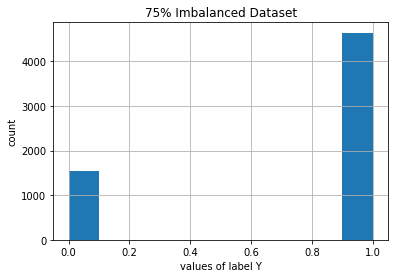

In [27]:
histogram3=y2.hist() # 75% are 1's

fig = histogram3.get_figure()

pl.title("75% Imbalanced Dataset")
pl.xlabel("values of label Y")
pl.ylabel("count")

fig.savefig('Imbalanced2 75 perc.pdf')

In [28]:
print(f'Distribution before imbalancing: {Counter(y)}')
print ('90% Imbalance \n' ) # number of 1's are 90% of the total lenght of column class 
X3, y3 = make_imbalance(x, y,
                              sampling_strategy={0: 516, 1: 4640},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y3)}')

print ('total number of rows now =', len(y3))

Distribution before imbalancing: Counter({0: 4640, 1: 4640})
90% Imbalance 

Distribution after imbalancing: Counter({1: 4640, 0: 516})
total number of rows now = 5156


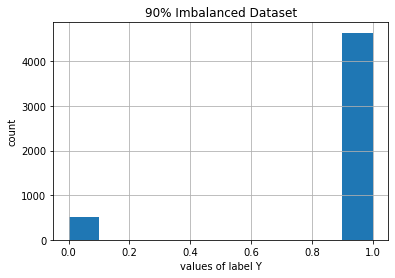

In [29]:
histogram4=y3.hist() # 90% are 1's

fig = histogram4.get_figure()

pl.title("90% Imbalanced Dataset")
pl.xlabel("values of label Y")
pl.ylabel("count")

fig.savefig(' Imbalanced2 90 perc.pdf')